# **Sentiment Analysis on IMDB Movie Reviews**
## In this project, we will analyze the sentiment of movie reviews from the IMDB dataset. We will process the data, visualize it, and build a machine learning model to classify the sentiment of the reviews as positive or negative.

# **Step 1: Import Libraries**

### We start by importing the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
import re
import string 
#nltk.download("stopwords")# if not downloaded
from nltk.corpus import stopwords
import tensorflow as tf

# **Step 2: Load Dataset**
### We will load the IMDB movie reviews dataset into a Pandas DataFrame for analysis.

In [2]:
df=pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


# **Step 3: Explore the Data**
### Before processing, it’s important to understand the distribution of sentiments in the dataset.

In [4]:
df["sentiment"].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     500 non-null    object
 1   sentiment  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [6]:
df.describe()

,review,sentiment
count,500,500
unique,500,2
top,One of the other reviewers has mentioned that ...,negative
freq,1,263


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df["sentiment"].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

# Step 4: Data Cleaning
### Next, we define a function to clean the reviews. This involves:
 
- ### Removing stopwords
- ### Converting text to lowercase
- ### Removing URLs and mentions
- ### Removing punctuation

In [9]:
def clean_reviews(review):
        # Remove stopwords
    text = " ".join(word for word in review.split() if word.lower() not in stopwords.words("english"))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"https\S+|www\S+http\S+", "", text, flags=re.MULTILINE)
    
    # Remove mentions (e.g., @username)
    text = re.sub(r"@[\w-]+", "", text)
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    return text


In [10]:
df["review"] = df["review"].apply(clean_reviews)

In [11]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


# **Step 5: Visualize the Data**
### We will create word clouds to visualize the most common words in positive and negative reviews.

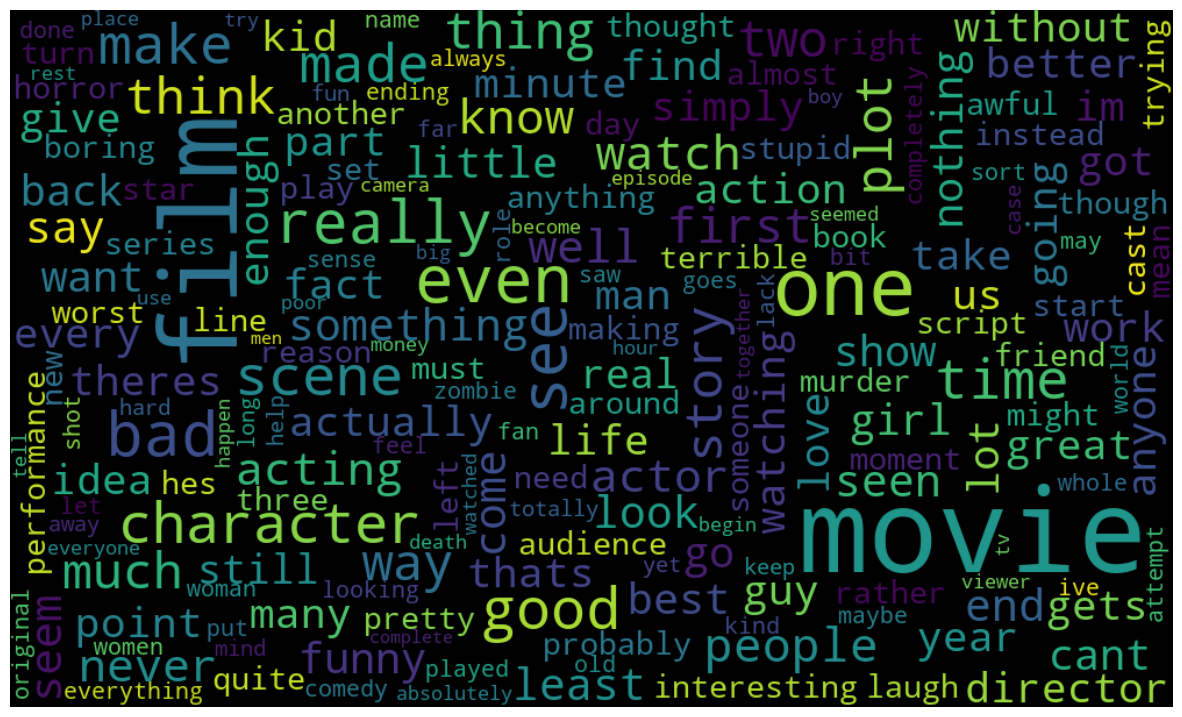

In [12]:
from wordcloud import WordCloud

negative_reviews=" ".join(word for word in df["review"][df["sentiment"]=="negative"].astype("str"))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(negative_reviews),interpolation="bilinear")
plt.axis("off")
plt.show()

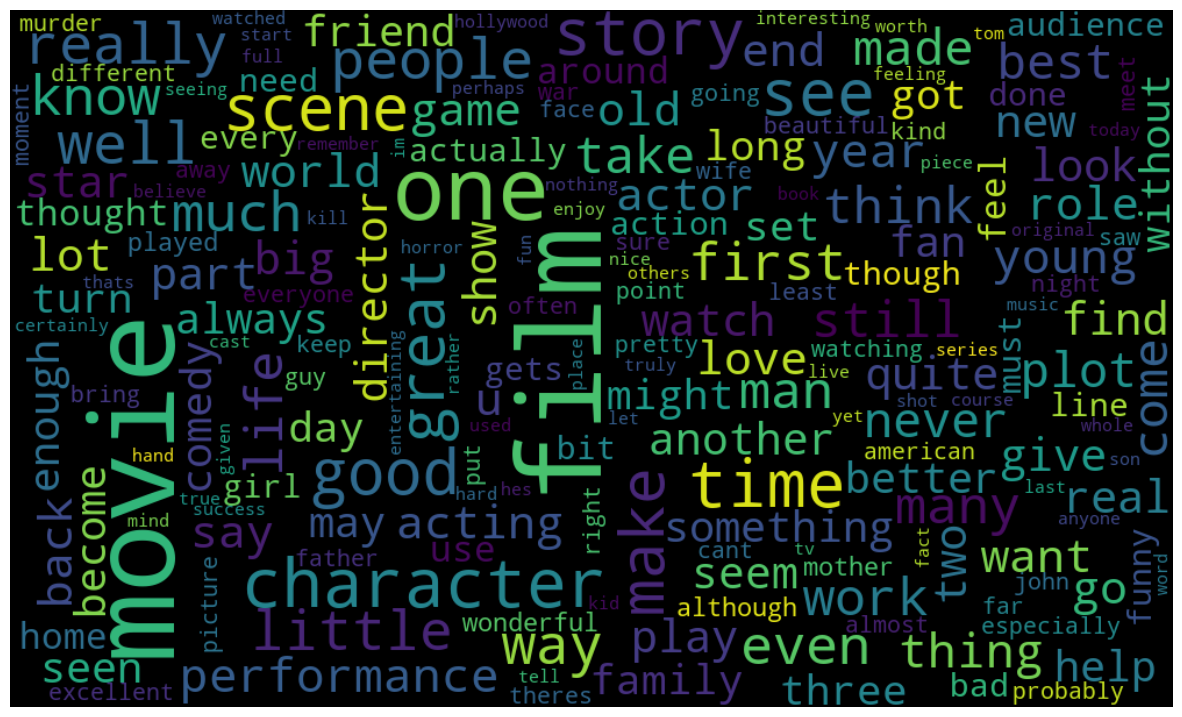

In [13]:
positive_review=" ".join(word for word in df["review"][df["sentiment"]=="positive"].astype(str))
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(positive_review),interpolation="bilinear")
plt.axis("off")
plt.show()

# **Step 6: Feature Extraction**
### We will convert the cleaned reviews into a numerical format using TF-IDF vectorization.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv=TfidfVectorizer(max_features=2500)
reviews=cv.fit_transform(df["review"]).toarray()

# **Step 7: Prepare the Data for Training**
### Next, we will split the dataset into training and testing sets.

In [15]:
df["sentiment"] = df["sentiment"].replace(["positive", "negative"], [1, 0]).astype(int)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10472\2173964664.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sentiment"] = df["sentiment"].replace(["positive", "negative"], [1, 0]).astype(int)


In [16]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [17]:
from sklearn.model_selection import train_test_split

reviews_train,reviews_test,sent_train,sent_test=train_test_split(reviews,df["sentiment"],test_size=0.2,random_state=42)

# **Step 8: Build the Model**
### We will use Logistic Regression to build our sentiment analysis model.

In [18]:
from sklearn.linear_model import LogisticRegression

LRmodel=LogisticRegression()

LRmodel.fit(reviews_train,sent_train)

LogisticRegression()

In [19]:
predicted=LRmodel.predict(reviews_test)

# **Step 9: Evaluate the Model**
### We will evaluate the model's performance using a confusion matrix and classification report.



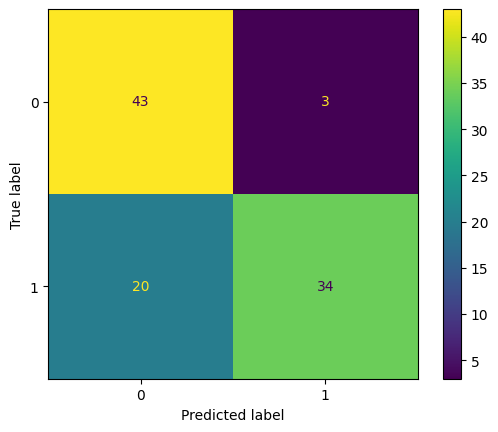

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sent_test,predicted,labels=LRmodel.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LRmodel.classes_)
display.plot()
plt.show()

In [21]:
from sklearn.metrics import classification_report
cr=classification_report(sent_test,predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.93      0.79        46
           1       0.92      0.63      0.75        54

    accuracy                           0.77       100
   macro avg       0.80      0.78      0.77       100
weighted avg       0.81      0.77      0.77       100



# **Step 10: Define Prediction Function**
### We define a function to check the sentiment of a new review.

In [22]:
def clean_text(text):
        text=" ".join(word for word in text.split() if word.lower() not in stopwords.words("english"))
        
        text=text.lower()
        
        text=re.sub(r"https\S+|www\S+http\S+","",text,flags=re.MULTILINE)
        text=re.sub(r"@[\w-]+","",text)
        text=re.sub(r"\d+","",text)
        text=text.translate(str.maketrans("","",string.punctuation))

        return text
        

In [23]:
def sentiment_check(text):
        
        cleaned_text=clean_text(text)
        
        if not cleaned_text:
            return None
        else:
            text_vector=cv.transform([cleaned_text]).toarray()
            result=LRmodel.predict(text_vector)
            return result


In [24]:
def validate_input(text):
        if not text:
                return "Review cannot be empty."
        if len(text) < 10:
                return "Review must be at least 10 characters long."

In [25]:
review="movie is very awfull"
val_message=validate_input(review)
if val_message:
    print(val_message)
else:
    result=sentiment_check(review)
    if result is None:
           print("Review cannot be empty/containing special characters/links/numbers")
    elif result==1:
            print("Positive Review")
    elif result==0:
            print("Negative Review")

Negative Review


# **Step 11: Save the Model**
### Finally, we save the trained model and the vectorizer for future use.

In [ ]:
import pickle as pk

In [ ]:
# Saving both the LR model and the vectorizer
pk.dump(LRmodel, open("model.pkl", "wb"))
pk.dump(cv,open("scaler.pkl","wb"))

# **Conclusion**
## In this project, we successfully built a sentiment analysis model to classify movie reviews from the IMDB dataset. We learned how to:

- ### Load and clean data.
- ### Visualize sentiments using word clouds.
- ### Convert text data into numerical features using TF-IDF.
- ### Train a Logistic Regression model and evaluate its performance.
- ### Define a function to predict sentiment for new reviews.
- ### This workflow can be applied to various text classification tasks in the field of Natural Language Processing (NLP).